In [ ]:
# Import all of the necessary libraries
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import cvlib as cv

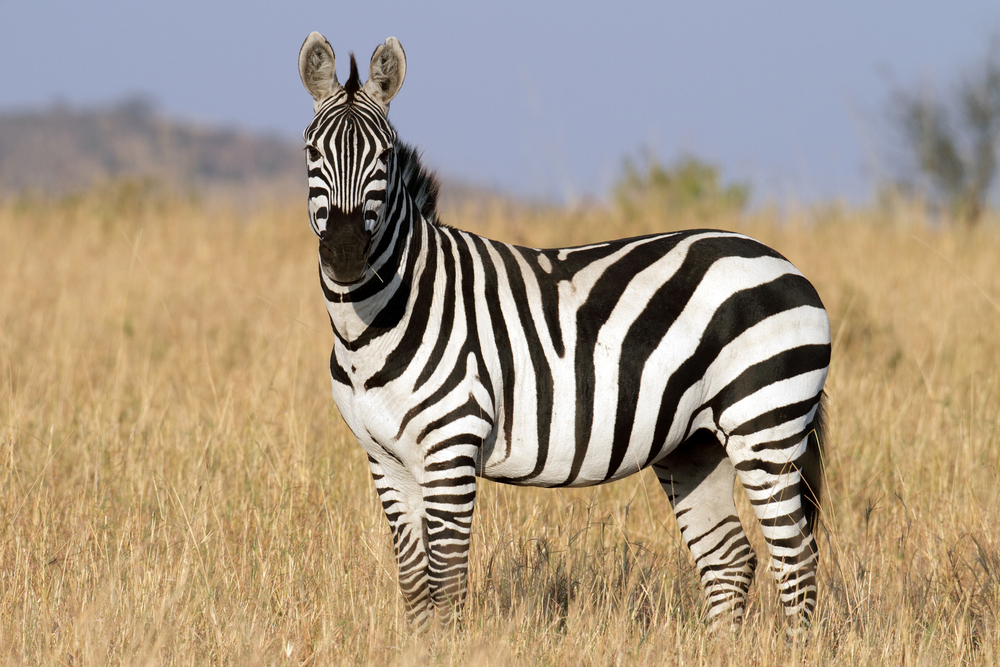

In [ ]:
# Load the image
zeb = cv2.imread('/content/zebra.jpg')

if zeb is None:
    print("Error: Could not load image. Check the file path.")
else:
    cv2_imshow(zeb)

In [ ]:
# Convert the NumPy array to a PIL Image object to access format, size, and mode
zeb_pil = Image.fromarray(zeb)

# Image Details using PIL
print(zeb_pil.format)
print(zeb_pil.size)
print(zeb_pil.mode)

None
(1000, 667)
RGB


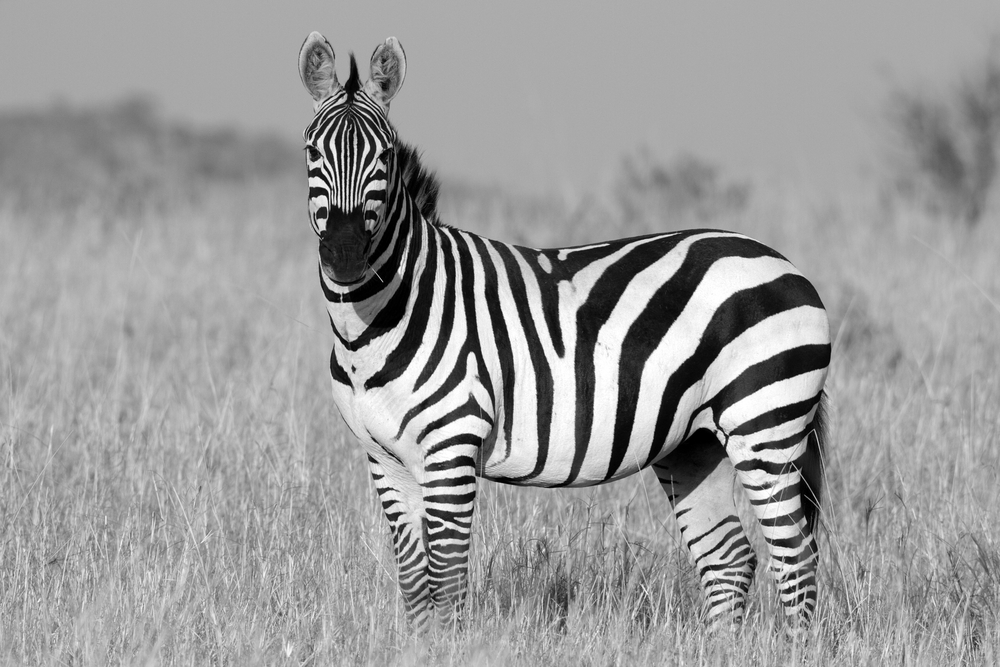

In [ ]:
# Convert the color image 'zeb' to grayscale
zgray = cv2.cvtColor(zeb, cv2.COLOR_BGR2GRAY)

# Display the image
cv2_imshow(zgray)

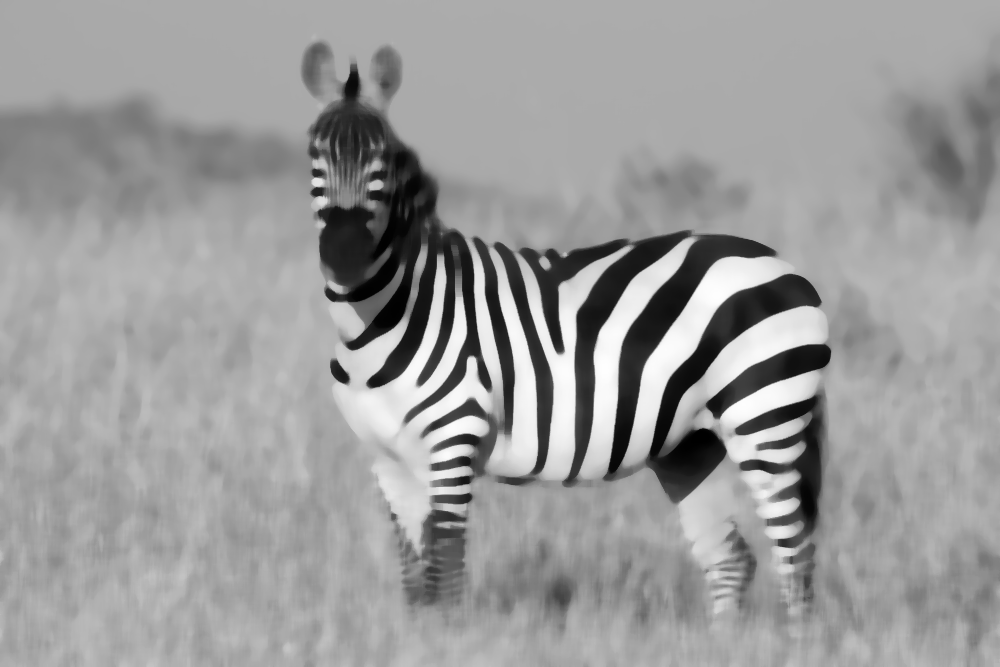

In [ ]:
# Apply median blur to the grayscale image 'zgray'.
zblur = cv2.medianBlur(zgray, 13)

# Display the image
cv2_imshow(zblur)

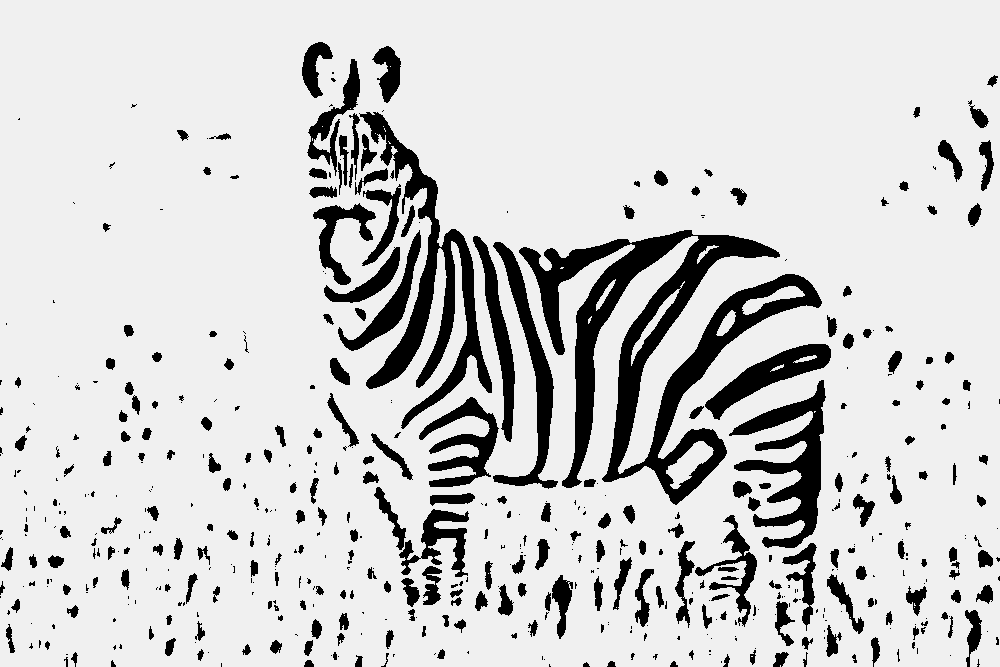

In [ ]:
# Apply adaptive thresholding to the blurred image 'zblur'.
zedge = cv2.adaptiveThreshold(zblur,240,
                              cv2.ADAPTIVE_THRESH_MEAN_C,
                              cv2.THRESH_BINARY,blockSize=23, C=7)

# Display the image
cv2_imshow(zedge)

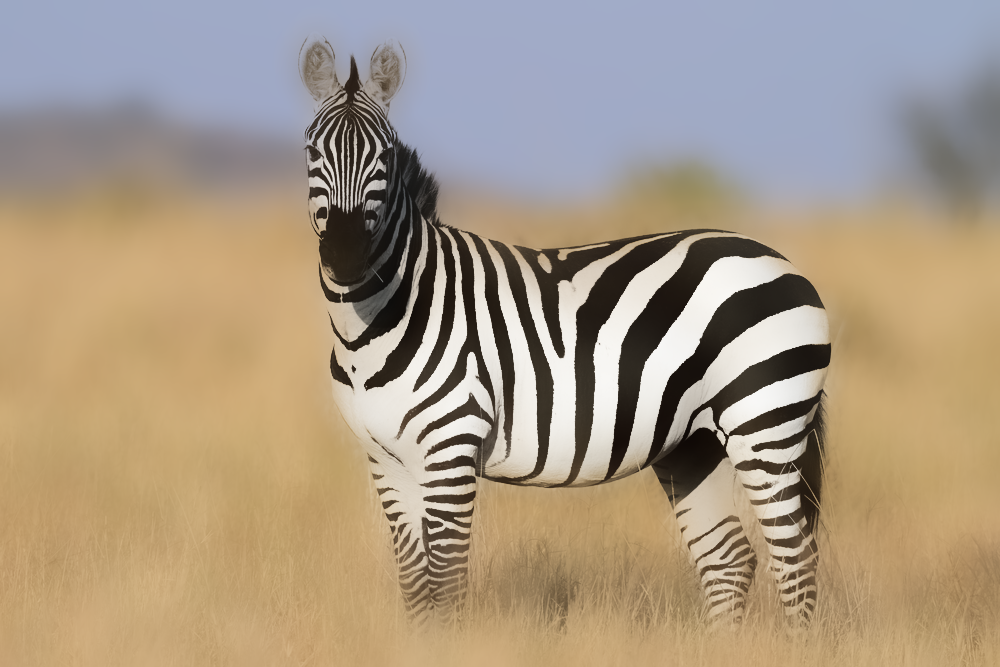

In [ ]:
# Apply bilateral filtering to the original color image 'zeb'.
zcol = cv2.bilateralFilter(zeb, d=55, sigmaColor=150, sigmaSpace=150)

# Display the image
cv2_imshow(zcol)

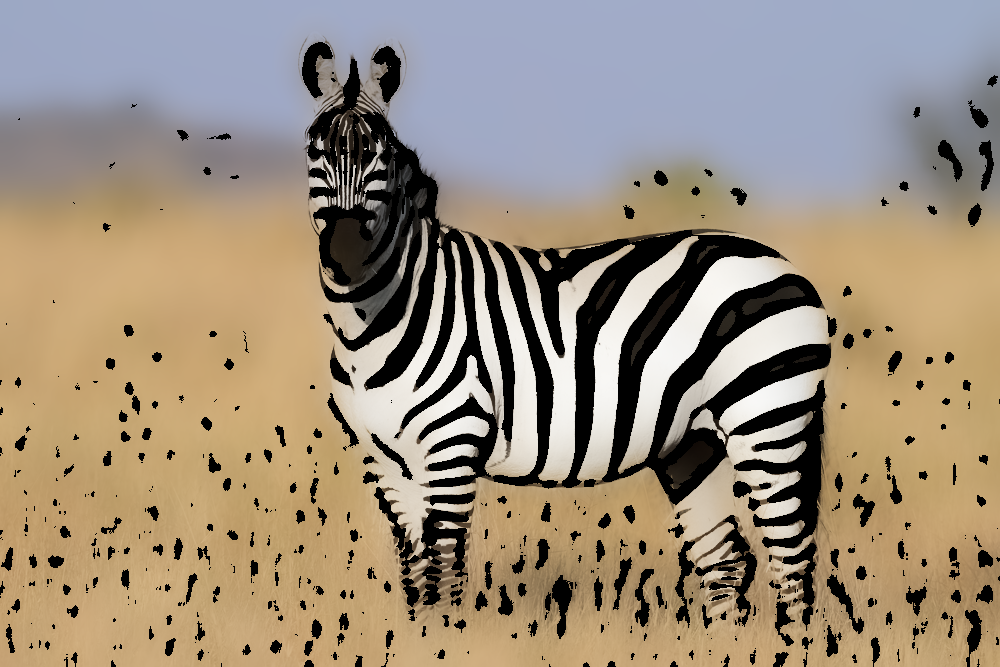

In [ ]:
# Combine the color image 'zcol' and the edge-detected image 'zedge' using bitwise AND.
zcar = cv2.bitwise_and(zcol, zcol, mask=zedge)

# Display the image
cv2_imshow(zcar)

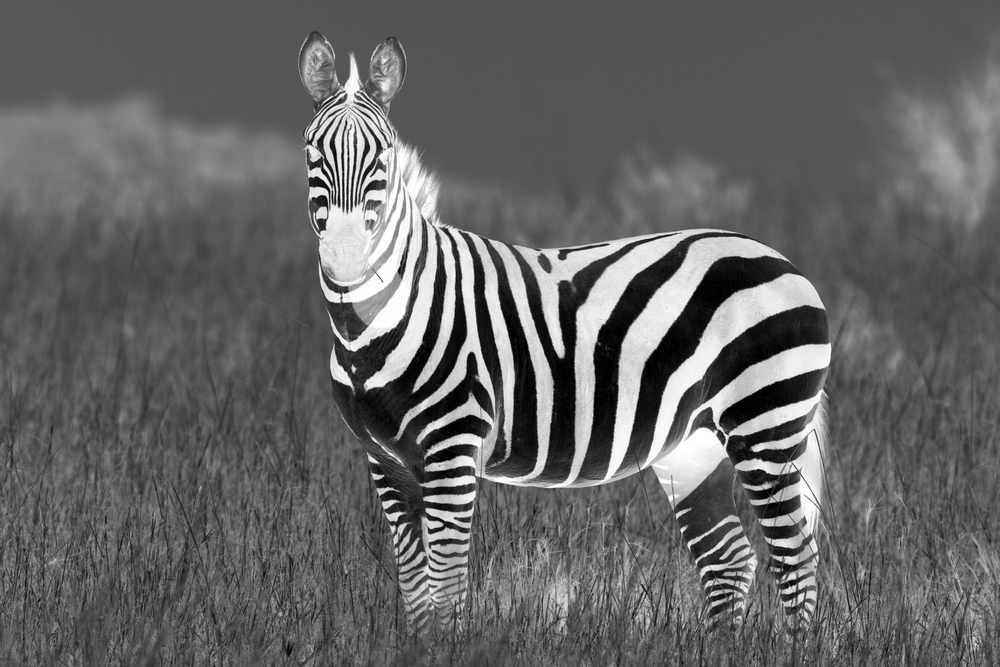

In [ ]:
# Invert the grayscale image 'zgray'.
zinv = 255 - zgray

# Display the image
cv2_imshow(zinv)

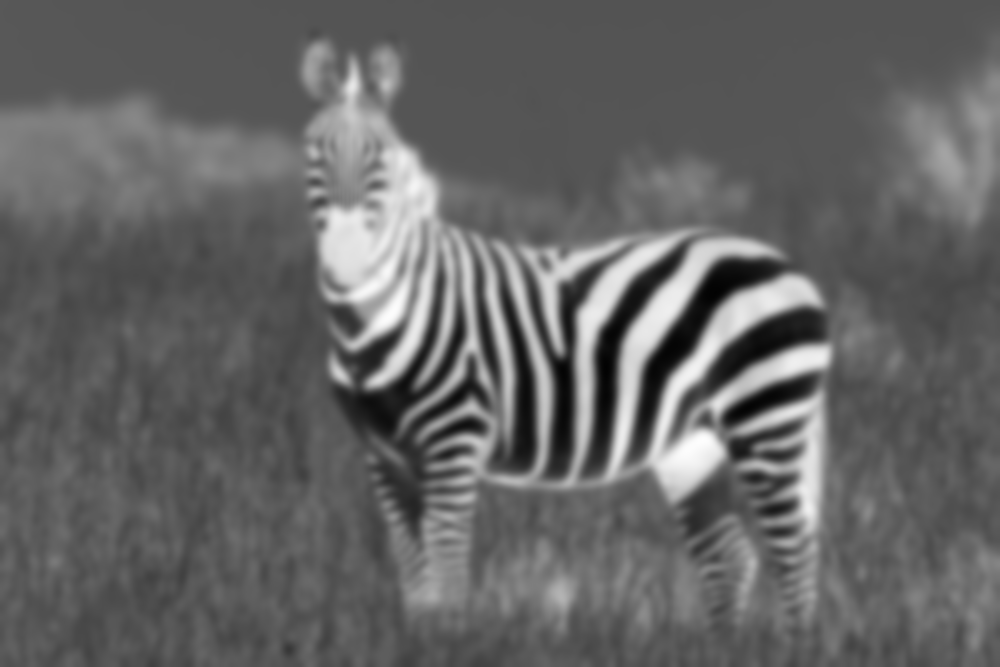

In [ ]:
# Apply Gaussian blur to the inverted grayscale image 'zinv'.
zblurr = cv2.GaussianBlur(zinv, (25, 25), 0)

# Display the image
cv2_imshow(zblurr)

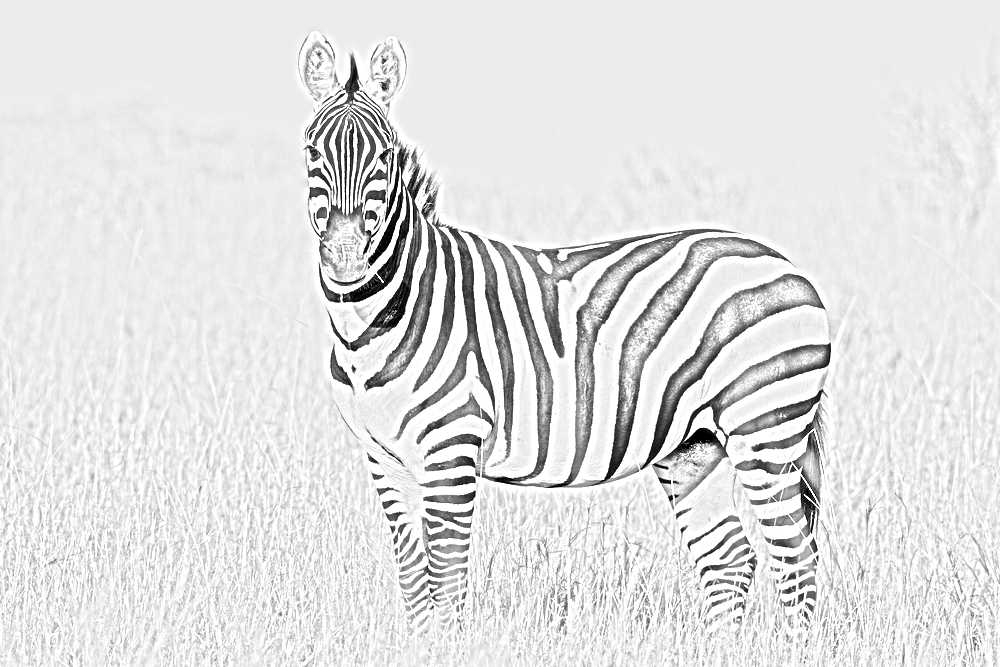

In [ ]:
# Invert the blurred image 'zblurr' to create 'zblurrr'.
zblurrr = 255 - zblurr

# Create the pencil sketch effect by dividing the grayscale image 'zgray' by 'zblurrr'.
pencil_sketch = cv2.divide(zgray, zblurrr, scale=236.0)

# Display the image
cv2_imshow(pencil_sketch)